In [4]:
import pysubgroup as ps
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

final_data = pd.read_csv('final_data.csv')
prepared_data = final_data
prepared_data['z'] = prepared_data['y']*prepared_data['treatment'] + (1-prepared_data['y'])*(1-prepared_data['treatment'])
prepared_data.treatment.value_counts()
prepared_data.y.value_counts()
prepared_data.z.value_counts()

df = prepared_data
plt.figure(figsize=(6, 6))
sns.distplot(df.y,kde=False)
sns.distplot(df.treatment,kde=False)

qfs = [ps.ChiSquaredQF(), ps.StandardQF(0.1), ps.StandardQF(0.3)]
qfs_names = ['ChiSquaredQF', 'StandardQF01', 'StandardQF03']
zip_qf = list(zip(qfs,qfs_names))

dfs = {}
for qf,qf_name in zip_qf:
    target = ps.BinaryTarget('z',target_value = True)
    searchspace = ps.create_selectors(df, ignore=['y','treatment','z'])
    task = ps.SubgroupDiscoveryTask (df, target, searchspace, result_set_size=10, depth=3, qf=qf)
    result = ps.SimpleDFS().execute(task)
    dfs[qf_name]=result.to_dataframe()
    
#Хи квадрат функция качества
df[(df['0.33q<=recency<=0.66q'] == 0) & (df['lifetime>0.66q'] == 0) & (df['recency>0.66q'] ==1)].y.value_counts()
plt.figure(figsize=(4, 6))
sns.barplot(x = [1,0],y=df[(df['0.33q<=recency<=0.66q'] == 0) & (df['lifetime>0.66q'] == 0) & (df['recency>0.66q'] ==1)].treatment.value_counts())

#Стандартная функция качества со взвешиванием 0.1
plt.figure(figsize=(4, 6))
sns.barplot(x = [1,0],y=df[(df['avgcart<0.33q'] == 0) & (df['recency>0.66q']==0) & (df['sum0>0.66q'] == 1)].treatment.value_counts())

# лучшая подгруппа со стандартной функцией качества с коэффициентом взвешивания = 0.3
df[(df['recency>0.66q']==0) & (df['sum0<0.33q'] == 0) & (df['sum0>0.66q'] == 1)].treatment.value_counts()

plt.figure(figsize=(4, 6))
sns.barplot(x = [1,0],y=df[(df['recency>0.66q']==0) & (df['sum0<0.33q'] == 0) & (df['sum0>0.66q'] == 1)].treatment.value_counts())

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df.drop(columns=['z','y','treatment']),df.y)
model.coef_[0]

df.drop(columns=['z','y','treatment']).columns
cols = df.columns
coefs = pd.DataFrame(list(zip(np.abs(model.coef_[0]),cols)),columns=['value','column'])
coefs.sort_values(by='value',ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x = 'value',y='column',data= coefs)

In [ ]:
import pysubgroup as ps
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
final_data = pd.read_csv('final_data.csv')
prepared_data = final_data
prepared_data['z'] = prepared_data['y']*prepared_data['treatment'] + (1-prepared_data['y'])*(1-prepared_data['treatment'])
prepared_data.treatment.value_counts()
prepared_data.y.value_counts()
prepared_data.z.value_counts()

In [7]:
df = prepared_data

1    9920
0    1418
Name: treatment, dtype: int64

In [12]:
qfs = [ps.ChiSquaredQF(), ps.StandardQF(0.1), ps.StandardQF(0.3)]
qfs_names = ['ChiSquaredQF', 'StandardQF01', 'StandardQF03']
zip_qf = list(zip(qfs,qfs_names))

In [13]:
dfs = {}
for qf,qf_name in zip_qf:
    target = ps.BinaryTarget('z',target_value = True)
    searchspace = ps.create_selectors(df, ignore=['y','treatment','z'])
    task = ps.SubgroupDiscoveryTask (df, target, searchspace, result_set_size=10, depth=3, qf=qf)
    result = ps.SimpleDFS().execute(task)
    dfs[qf_name]=result.to_dataframe()

## Данные клиентов

In [121]:
data = pd.read_csv('MobTargData-Original.csv',sep=';')
work_columns = ['text1','text2','numbasket_firsttwoweeks','numbasket_secondtwoweeks','sum_firsttwoweeks','recency','lifetime','numbasket0','sum0','bigstoreshare']
work_data = data[work_columns]
work_data['avgcart'] = work_data['sum0'] / work_data['numbasket0']

D:\Home\sholodnickiy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [129]:
np.quantile(work_data['sum0'],0.33)

9874.795979000002

## ХИ квадрат

In [102]:
dfs['ChiSquaredQF'].description.iloc[0]

(0.33q<=recency<=0.66q==0 and lifetime>0.66q==0 and recency>0.66q==1)

D:\Home\sholodnickiy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


318.65331655844153

In [35]:
#Хи квадрат функция качества
df[(df['0.33q<=recency<=0.66q'] == 0) & (df['lifetime>0.66q'] == 0) & (df['recency>0.66q'] ==1)].y.value_counts()

0    2583
1    1041
Name: y, dtype: int64

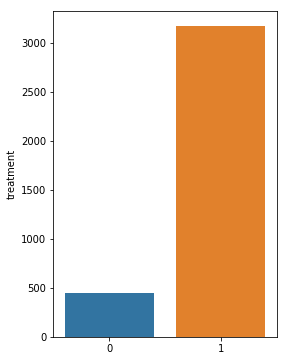

In [116]:
plt.figure(figsize=(4, 6))
sns.barplot(x = [1,0],y=df[(df['0.33q<=recency<=0.66q'] == 0) & (df['lifetime>0.66q'] == 0) & (df['recency>0.66q'] ==1)].treatment.value_counts())


## конец ХИ квадрат

## Стандартная функция с 0.1 взвешиванием

In [57]:
dfs['StandardQF01'].description.iloc[0]

(avgcart<0.33q==0 and recency>0.66q==0 and sum0>0.66q==1)

In [34]:
df[(df['avgcart<0.33q'] == 0) & (df['recency>0.66q']==0) & (df['sum0>0.66q'] == 1)].y.value_counts()

1    2976
0     130
Name: y, dtype: int64

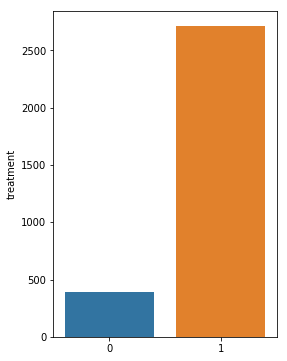

In [135]:
plt.figure(figsize=(4, 6))
sns.barplot(x = [1,0],y=df[(df['avgcart<0.33q'] == 0) & (df['recency>0.66q']==0) & (df['sum0>0.66q'] == 1)].treatment.value_counts())


## Конец Стандартная функция с 0.1 взвешиванием

In [71]:
dfs['StandardQF03'].description.iloc[1]

(recency>0.66q==0 and sum0<0.33q==0 and sum0>0.66q==1)

In [79]:
df[(df['recency>0.66q']==0) & (df['sum0<0.33q'] == 0)].y.value_counts()

1    5732
0     513
Name: y, dtype: int64

In [18]:
# лучшая подгруппа со стандартной функцией качества с коэффициентом взвешивания = 0.3
df[(df['recency>0.66q']==0) & (df['sum0<0.33q'] == 0) & (df['sum0>0.66q'] == 1)].treatment.value_counts()

1    3066
0     448
Name: treatment, dtype: int64

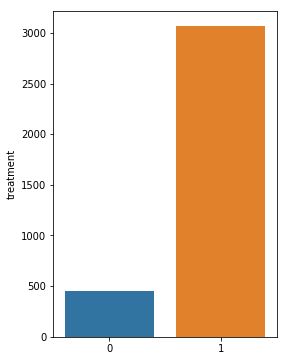

In [15]:
plt.figure(figsize=(4, 6))
sns.barplot(x = [1,0],y=df[(df['recency>0.66q']==0) & (df['sum0<0.33q'] == 0) & (df['sum0>0.66q'] == 1)].treatment.value_counts())


In [80]:
df.treatment.value_counts() , df.y.value_counts()

(1    9920
 0    1418
 Name: treatment, dtype: int64, 1    7790
 0    3548
 Name: y, dtype: int64)

In [33]:
df.treatment.value_counts()

1    9920
0    1418
Name: treatment, dtype: int64

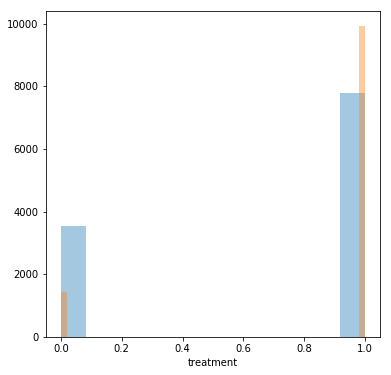

In [100]:
plt.figure(figsize=(6, 6))
sns.distplot(df.y,kde=False)
sns.distplot(df.treatment,kde=False)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df.drop(columns=['z','y','treatment']),df.y)
model.coef_[0]


D:\Home\sholodnickiy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([ 1.38620467, -1.47612207,  0.56811021, -0.08105273,  0.36287561,
        0.19636993,  0.0949877 ,  0.15002129,  0.23318383, -0.6866012 ,
        0.88348574,  0.28130827,  0.19400676,  0.03754256,  0.24664349])

In [25]:

df.drop(columns=['z','y','treatment']).columns
cols = df.columns
coefs = pd.DataFrame(list(zip(np.abs(model.coef_[0]),cols)),columns=['value','column'])
coefs.sort_values(by='value',ascending=False)

,value,column
1,1.476122,recency>0.66q
0,1.386205,recency<0.33q
10,0.883486,sum0>0.66q
9,0.686601,sum0<0.33q
2,0.568110,0.33q<=recency<=0.66q
4,0.362876,lifetime>0.66q
11,0.281308,0.33q<=sum0<=0.66q
14,0.246643,avgcart>0.66q
8,0.233184,0.33q<=bigstoreshare<=0.66q
5,0.196370,0.33q<=lifetime<=0.66q


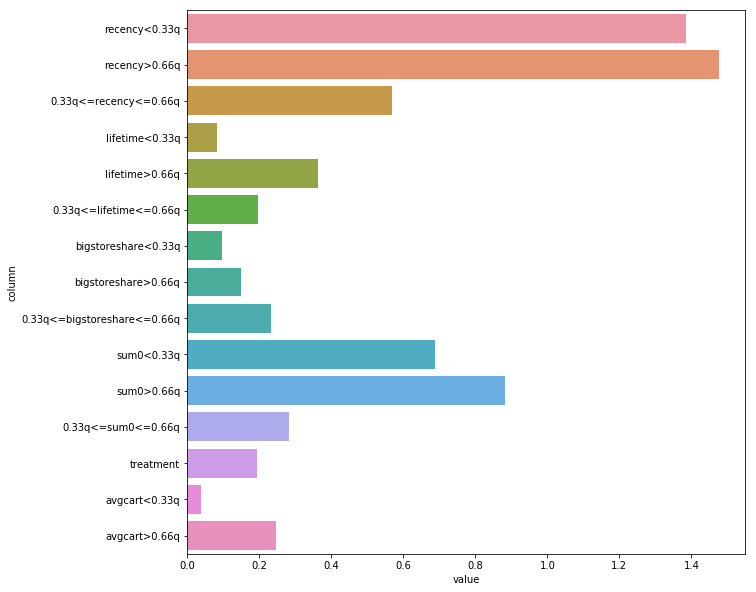

In [32]:

df.drop(columns=['z','y','treatment']).columns
cols = df.columns
coefs = pd.DataFrame(list(zip(np.abs(model.coef_[0]),cols)),columns=['value','column'])
coefs.sort_values(by='value',ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x = 'value',y='column',data= coefs)